In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
train = pd.read_csv(r"C:\Users\sanje_crlv28m\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\sanje_crlv28m\Downloads\test.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


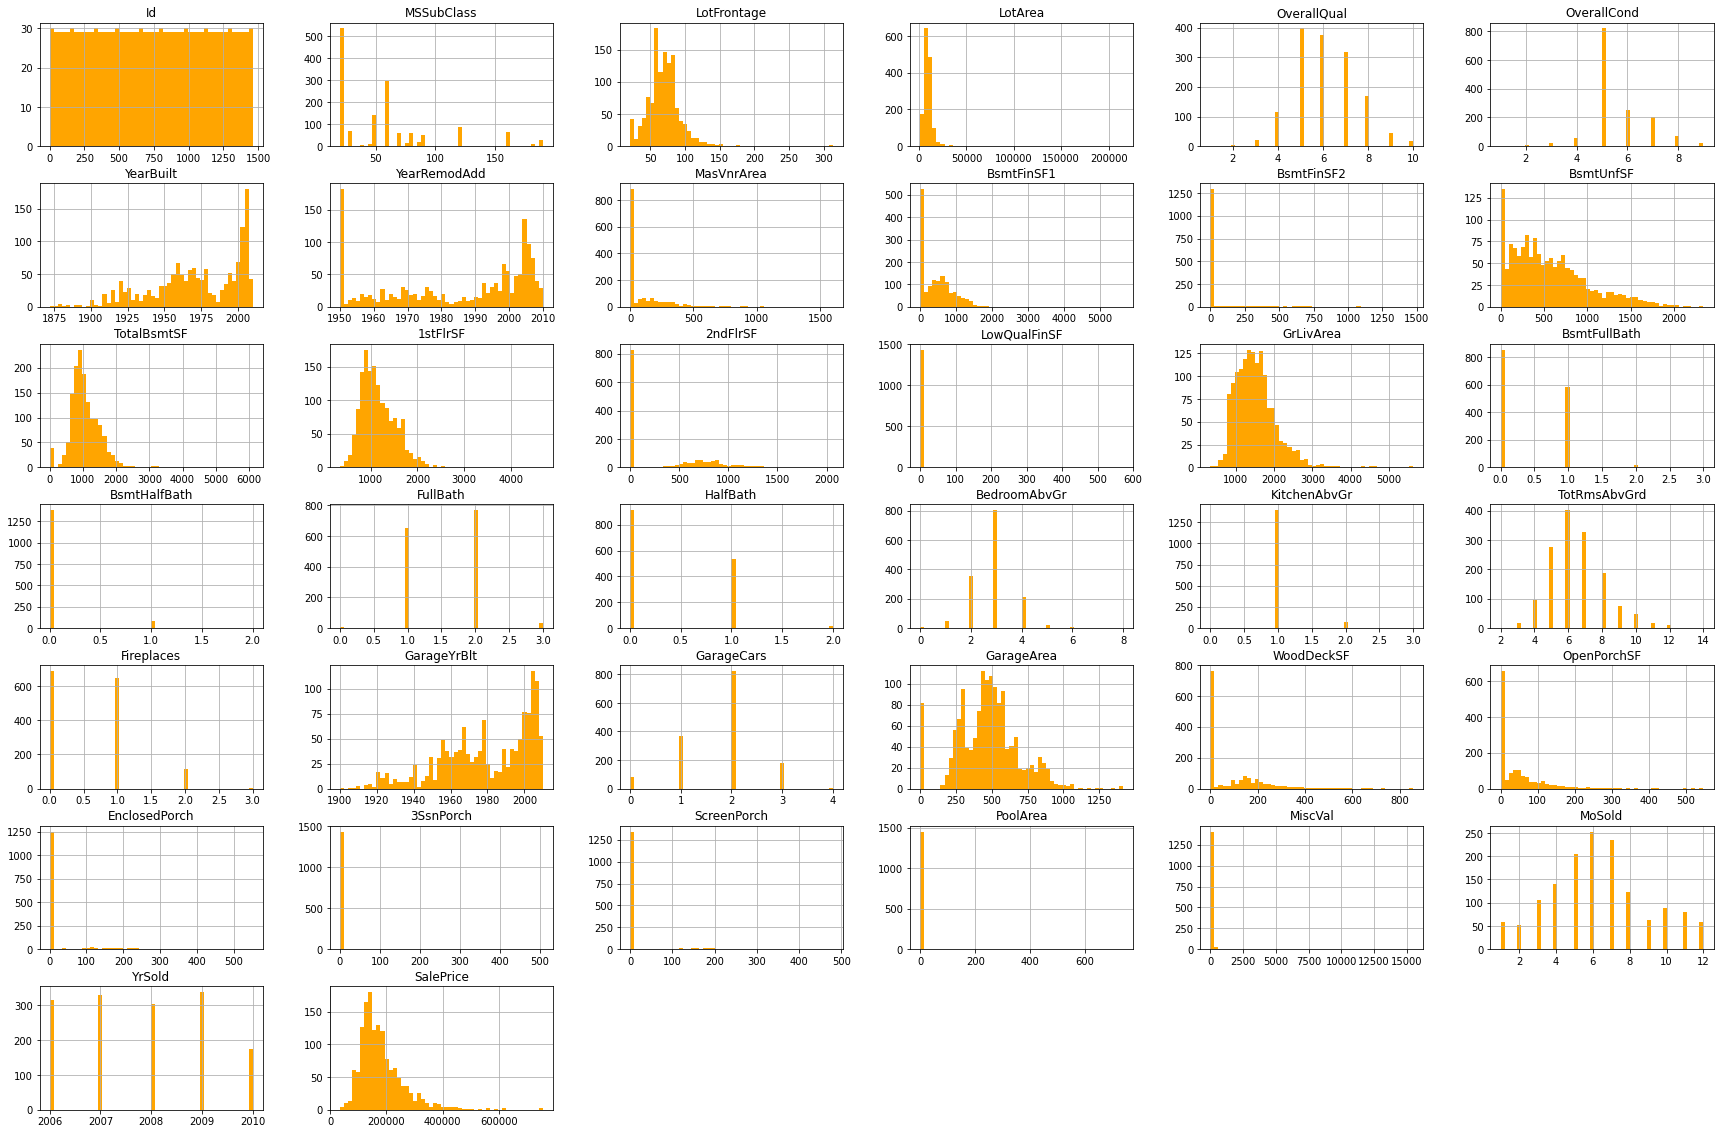

In [9]:
train.select_dtypes(np.number).hist(bins = 50,figsize =(30,20),color='orange');

In [10]:
corr_matrix = train.select_dtypes(np.number).corr()
corr = corr_matrix["SalePrice"].sort_values(ascending = False)
print(corr)
indexNames = corr[abs(corr.values) < 0.4].index.values
indexNames = np.setdiff1d(indexNames, ['Id','MSSubClass'])

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [13]:
# Train and test data
y_target = train['SalePrice']
test_ids = test.Id
train_v0 = train.drop(['Id','SalePrice'], axis = 1)
test_v0 = test.drop('Id',axis = 1)
data_v0 = pd.concat([train_v0,test_v0],axis = 0)
data_v0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [14]:
data_v0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [16]:
y_target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
data_v0['MSSubClass'] = data_v0['MSSubClass'].astype(str)
data_v0.MSSubClass.dtype

dtype('O')

In [18]:
cat_mode_cols = [
    'MasVnrType', 
    'MSZoning', 
    'Functional',
    'Utilities',
    'Exterior2nd',
    'KitchenQual', 
    'Electrical', 
    'Exterior1st',
    'SaleType'   
]
for col in cat_mode_cols:
    data_v0[col].fillna(data_v0[col].mode()[0],inplace = True)
    
cat_None_cols =  [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'GarageType',
    'PoolQC',
     'Fence',
    'MiscFeature'
]   

for col in cat_None_cols:
    data_v0[col].fillna('None',inplace = True)

In [19]:
ordinal_cols     = {'GarageFinish'  : {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                    'GarageQual'    : {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'GarageCond'    : {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtQual'      : {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtCond'      : {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtExposure'  : {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                    'BsmtFinType1'  : {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                    'BsmtFinType2'  : {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                    'ExterQual'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'ExterCond'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'HeatingQC'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'KitchenQual'   : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'Electrical'    : {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                    'CentralAir'    : {'N': 0, 'Y': 1},
                    'PavedDrive'    : {'N': 1, 'P': 2, 'Y': 3}
                    }

data_v0.replace(ordinal_cols, inplace=True)

In [20]:
# Display Missing values
def display_missing(train,cols):
    mis_val = train.isna().sum().sort_values(ascending=False)
    mis_val_per = (mis_val / len(train) *100).sort_values(ascending=False).round(1)
    mis_val_table = pd.concat([mis_val,mis_val_per], axis = 1,keys =['# Missing Values','% Total Missing'])
    return mis_val_table.head(cols)

In [21]:
display_missing(data_v0.select_dtypes('object'),22)

,# Missing Values,% Total Missing
MSSubClass,0,0.0
RoofMatl,0,0.0
SaleType,0,0.0
MiscFeature,0,0.0
Fence,0,0.0
PoolQC,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Functional,0,0.0
Heating,0,0.0


In [26]:
data_v2 = data_v1.copy()

In [27]:
data_v2 = pd.get_dummies(data_v2)
data_v2

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
1455,21.0,1894,4,5,1970,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
1456,160.0,20000,5,7,1960,1996,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,3,3,4,...,0,0,0,1,0,0,0,0,1,0


In [28]:
# Scaling
data_v3= data_v2.copy()

In [29]:
scaler = MinMaxScaler()
data_v3 = pd.DataFrame(scaler.fit_transform(data_v2), columns = data_v3.columns)
data_v3.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.666667,0.5,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.333333,0.5,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.666667,0.5,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.333333,0.5,0.6,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.666667,0.5,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
imputer = KNNImputer(n_neighbors=5)
data_v3 = pd.DataFrame(imputer.fit_transform(data_v3),columns = data_v3.columns)

In [31]:
data_v3.isna().any()

LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 259, dtype: bool

In [32]:
data_v3.isna().sum()

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 259, dtype: int64

In [33]:
# Split the data
data_v4 = data_v3.copy()

In [34]:
train_final = data_v3.loc[:train_v0.index.max(), :].copy()
test_final = data_v3.loc[train_v0.index.max() + 1:, :].reset_index(drop=True).copy()

In [35]:
# Model Comparison
X_train, X_val, y_train, y_val =train_test_split(train_final, y_target ,train_size=0.8, test_size=0.2,random_state=0)

In [39]:
# Random Forest Model
forest_model = RandomForestRegressor(n_estimators=500, max_depth=10)
forest_model.fit(X_train, y_train)
predicted_random_forest = forest_model.predict(X_val)
forest_model.score(X_train,y_train)
print('RMSE:', mean_squared_error(np.log(y_val), np.log(predicted_random_forest),squared=False))

RMSE: 0.14084480369464147
